# Netflix data EDA

**importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')

In [2]:
#reading data and checking shape
netflix_df = pd.read_csv('../input/netflix-subscription-price-in-different-countries/Netflix subscription fee Dec-2021.csv')
netflix_df.shape

(65, 8)

In [3]:
#Looking at data
netflix_df.head(10)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99
5,br,Brazil,4972,3162,1810,4.61,7.11,9.96
6,bg,Bulgaria,6797,4819,1978,9.03,11.29,13.54
7,ca,Canada,6239,4311,1928,7.91,11.87,15.03
8,cl,Chile,4994,3156,1838,7.07,9.91,12.74
9,co,Colombia,4991,3156,1835,4.31,6.86,9.93


In [4]:
#columns of dataframe
netflix_df.columns

Index(['Country_code', 'Country', 'Total Library Size', 'No. of TV Shows',
       'No. of Movies', 'Cost Per Month - Basic ($)',
       'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)'],
      dtype='object')

In [5]:
#general dataframe info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_code                   65 non-null     object 
 1   Country                        65 non-null     object 
 2   Total Library Size             65 non-null     int64  
 3   No. of TV Shows                65 non-null     int64  
 4   No. of Movies                  65 non-null     int64  
 5   Cost Per Month - Basic ($)     65 non-null     float64
 6   Cost Per Month - Standard ($)  65 non-null     float64
 7   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 4.2+ KB


* 1) No null values in any column 
* 2) 3 int dtype columns(library size)
* 3) 2 obj columns(country code and country name)
* 4) 3 float columns(prices)


In [6]:
#descrive dataframe
netflix_df.describe()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,5314.415385,3518.953846,1795.461538,8.368462,11.990000,15.612923
std,980.322633,723.010556,327.279748,1.937819,2.863979,4.040672
min,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000
25%,4948.000000,3154.000000,1628.000000,7.990000,10.710000,13.540000
50%,5195.000000,3512.000000,1841.000000,8.990000,11.490000,14.450000
75%,5952.000000,3832.000000,1980.000000,9.030000,13.540000,18.060000
max,7325.000000,5234.000000,2387.000000,12.880000,20.460000,26.960000


* Min basic price: 1.97
* Min standard price: 3.00
* Min premium price: 4
* Max basic price: 12.88
* Max standard price: 20.46
* Max premium price: 26.96


In [7]:
#checking countries code too for extra assurance
netflix_df['Country_code'].unique

<bound method Series.unique of 0     ar
1     au
2     at
3     be
4     bo
      ..
60    ua
61    gb
62    us
63    uy
64    ve
Name: Country_code, Length: 65, dtype: object>

So netflix operates in 65 unique countries worldwide out of 195. That's less than half of the total number of countries.

# **Do some data distributions now**

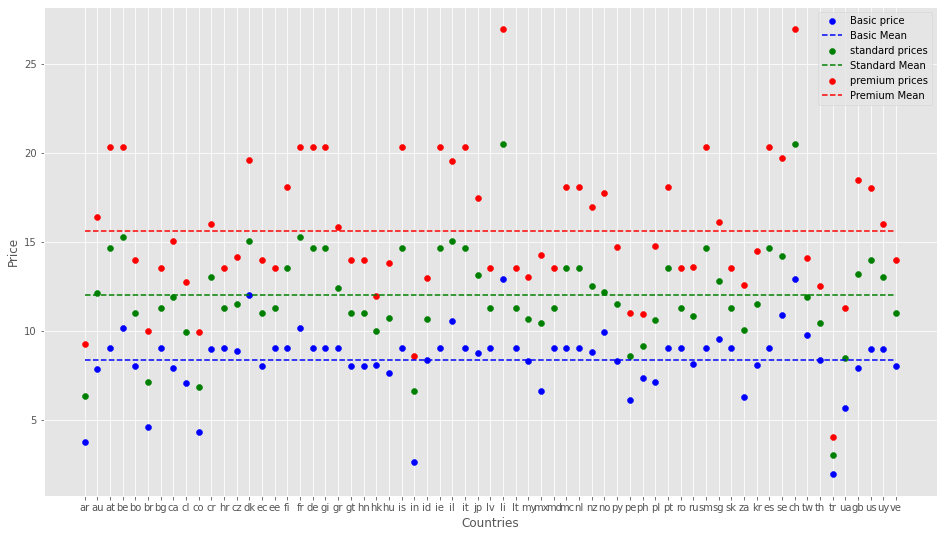

In [8]:
plt.figure(figsize=(16,9))


avg_basic= netflix_df.describe()['Cost Per Month - Basic ($)']['mean']
avg_data_basic = np.array([avg_basic]*netflix_df.shape[0])

avg_standard = netflix_df.describe()['Cost Per Month - Standard ($)']['mean']
avg_data_standard = np.array([avg_standard]*netflix_df.shape[0])

avg_premium = netflix_df.describe()['Cost Per Month - Premium ($)']['mean']
avg_data_premium = np.array([avg_premium]*netflix_df.shape[0])

plt.scatter(netflix_df['Country_code'],netflix_df['Cost Per Month - Basic ($)'],c='b',label='Basic price')
#plt.plot(netflix_df['Country_code'],netflix_df['Cost Per Month - Basic ($)'],c='b',label='Basic price')
plt.plot(netflix_df['Country_code'],avg_data_basic,label='Basic Mean', linestyle='--',c='b')

plt.scatter(netflix_df['Country_code'],netflix_df['Cost Per Month - Standard ($)'],c='g',label='standard prices')
#plt.plot(netflix_df['Country_code'],netflix_df['Cost Per Month - Standard ($)'],c='g', label='standard prices')
plt.plot(netflix_df['Country_code'],avg_data_standard,label='Standard Mean', linestyle='--',c='g')

plt.scatter(netflix_df['Country_code'],netflix_df['Cost Per Month - Premium ($)'],c='r',label='premium prices')
#plt.plot(netflix_df['Country_code'],netflix_df['Cost Per Month - Premium ($)'],c='r',label='premium prices')
plt.plot(netflix_df['Country_code'],avg_data_premium,label='Premium Mean', linestyle='--',c='r')

plt.ylabel('Price')
plt.xlabel('Countries')
plt.legend()
plt.show()

* Liechtenstein and switzerland have the highest premium prices
* All plans for turkey are less than $5
* Some premium prices for one country are less than the basic prices of others


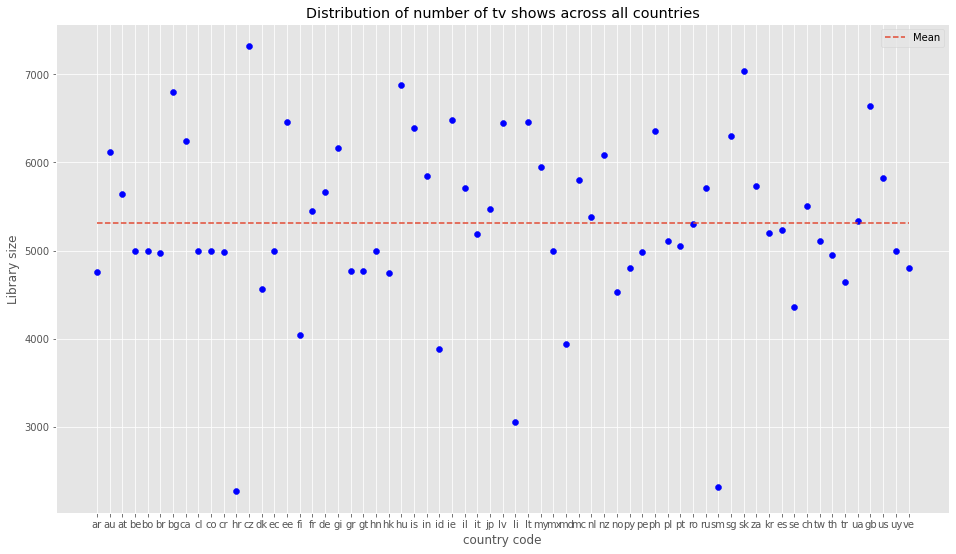

In [9]:
#distribution of library size
avg = netflix_df.describe()['Total Library Size']['mean']
avg_data = np.array([avg]*netflix_df.shape[0])

plt.figure(figsize=(16,9))
plt.scatter(netflix_df['Country_code'],netflix_df['Total Library Size'],c='b')
plt.plot(netflix_df['Country_code'],avg_data,label='Mean', linestyle='--')
plt.legend()
plt.title('Distribution of number of tv shows across all countries')
plt.ylabel('Library size')
plt.xlabel('country code')
plt.show()

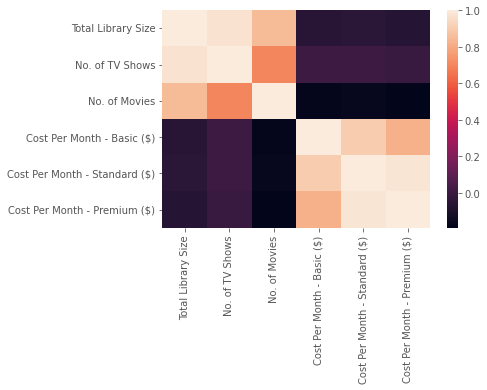

In [10]:
correlation = netflix_df.corr()
hm = sns.heatmap(correlation)
plt.show()

* total library size is highly correlated with no. of tv shows and no. of movies
* cost per month basic is highly correlation with cost per month standard and cost per month premium
